# Import : by GitHub

You can try this code in Colab by this method.  

In [47]:
!git clone https://github.com/KanghwaSisters/24_2_mainSession.git

fatal: destination path '24_2_mainSession' already exists and is not an empty directory.


In [48]:
import os
os.chdir('/content/24_2_mainSession/4주차/env')

In [49]:
! python GridWorldEnvironment.py

In [50]:
from GridWorldEnvironment import GridWorldEnvironment

In [51]:
env = GridWorldEnvironment(start_point=(0,0),
                           end_point=(4,4),
                           gridworld_size=(5,5))

In [52]:
#추가적으로 정의한 클래스
class GridWorldEnvironment:
    def __init__(self, start_point, end_point, gridworld_size):
        self.start_point = start_point
        self.end_point = end_point
        self.gridworld_size = gridworld_size
        self.agent_position = list(self.start_point)  # 리스트로 변환하여 저장
        self.n_actions = 4  # 상, 하, 좌, 우 행동 정의

    def reset(self):
        self.agent_position = list(self.start_point)  # 리스트로 변환하여 초기화
        return self.agent_position

    def step(self, action):
        # 행동: 0=상, 1=하, 2=좌, 3=우
        if action == 0 and self.agent_position[0] > 0:  # 상
            self.agent_position[0] -= 1
        elif action == 1 and self.agent_position[0] < self.gridworld_size[0] - 1:  # 하
            self.agent_position[0] += 1
        elif action == 2 and self.agent_position[1] > 0:  # 좌
            self.agent_position[1] -= 1
        elif action == 3 and self.agent_position[1] < self.gridworld_size[1] - 1:  # 우
            self.agent_position[1] += 1

        # 보상과 종료 조건 설정
        reward = 1  # 기본적으로 보상은 1
        done = False
        if self.agent_position == list(self.end_point):  # 목표에 도달하면
            reward = 100  # 큰 보상
            done = True

        return self.agent_position, reward, done  # 다음 상태, 보상, 종료 여부 반환

    def render(self):
        grid = [['-' for _ in range(self.gridworld_size[1])] for _ in range(self.gridworld_size[0])]
        grid[self.end_point[0]][self.end_point[1]] = 'G'  # 목표 지점
        grid[self.agent_position[0]][self.agent_position[1]] = 'A'  # 에이전트 위치
        for row in grid:
            print(' '.join(row))
        print()

    def print_value_all(self, q_table):
        print(q_table)



# SARSA Class

In [53]:
import numpy as np
import random
from collections import defaultdict

class SARSAgent:
    def __init__(self, actions):
        self.actions = env.n_actions #에이전트가 할 수 있는 행동! 환경에서 받아오는 정보. 그리드월드에서는 [0,1,2,3] -> 상,하,좌,우
        self.step_size = 0.01
        self.discount_factor = 0.9 #할인율
        self.epsilon = 0.1 #e-탐욕 정책
        self.q_table = defaultdict(lambda: [0.0, 0.0, 0.0, 0.0]) # 0을 초기값으로 가지는 큐함수 테이블 생성 -> 특정 상태의 큐함수만 업데이트하기 위한 공간 생성

        # <s, a, r, s', a'>의 샘플로부터 큐함수를 업데이트
    def learn(self, state, action, reward, next_state, next_action):
        state, next_state = str(state), str(next_state)
        current_q = self.q_table[state][action]
        next_state_q = self.q_table[next_state][next_action]
        td = reward + self.discount_factor * next_state_q - current_q
        new_q = current_q + self.step_size * td
        self.q_table[state][action] = new_q

        # e-탐욕 정책에 따라서 행동을 반환
    def get_action(self, state):
        if np.random.rand() < self.epsilon: #0~1 사이 무작위 값과 epsilon값 비교
            # 무작위(임의의) 행동 반환
            action = np.random.choice(self.actions)
        else:
            # 큐함수에 따른 행동 반환
            state = str(state)
            q_list = self.q_table[state] #상태 state에 저장돼 있는 큐함수를 불러옴
            action = self.arg_max(q_list) #큐함수 중 최댓값을 행동으로 반환
        return action

        # 큐함수의 값에 따라 최적의 행동을 반환
    def arg_max(self, q_list):
        max_idx_list = np.argwhere(q_list == np.amax(q_list))
        max_idx_list = max_idx_list.flatten().tolist()
        return random.choice(max_idx_list) #최댓값 여러 개일 경우 무작위 선택


# Main

- **SARSA**를 이용해 그리드 월드 학습시키기  
- 학습 지표 시각화

In [54]:
if __name__ == "__main__":
    env = GridWorldEnvironment(start_point=(0,0),
                           end_point=(4,4),
                           gridworld_size=(5,5))
    agent = SARSAgent(env.n_actions)

    for episode in range(20):
        # 게임 환경과 상태를 초기화
        state = env.reset()
        # 현재 상태에 대한 행동을 선택
        action = agent.get_action(state)

        while True:
            env.render()

            # 행동을 위한 후 다음상태 보상 에피소드의 종료 여부를 받아옴
            next_state, reward, done = env.step(action)
            # 다음 상태에서의 다음 행동 선택
            next_action = agent.get_action(next_state)
            # <s,a,r,s',a'>로 큐함수를 업데이트
            agent.learn(state, action, reward, next_state, next_action)

            state = next_state
            action = next_action

            # 모든 큐함수를 화면에 표시
            env.print_value_all(agent.q_table)

            if done:
                break

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.

defaultdict(<function SARSAgent.__init__.<locals>.<lambda> at 0x78529604f0a0>, {'[0, 0]': [0.8116944772653091, 0.0, 3.8862144668109155, 0.0], '[0, 1]': [0.04152379260361306, 0.0, 0.059671857679370416, 0.1770702532694689], '[1, 1]': [0.010090809999999999, 0.020170545811716137, 0.01009, 0.08919417025808765], '[1, 2]': [0.020795145935951886, 0.02061721314685189, 0.0, 0.08964083874125915], '[2, 1]': [0.0, 0.01999081729, 0.010090809999999999, 0.01009], '[1, 0]': [0.22712517703002763, 0.23850183448457069, 2.3048363421260536, 0.0], '[2, 0]': [0.11015208141451707, 0.08053635974947929, 0.010991368732730654, 0.0], '[3, 1]': [0.0, 0.01, 0.14878286830769508, 0.09171942392064672], '[3, 0]': [0.112533749143164, 0.1532789464985252, 2.6961745174915044, 0.0], '[3, 2]': [0.021217570993412684, 0.0, 0.1747139557704553, 0.04091642208351441], '[3, 3]': [0.0, 0.010539457822090396, 0.15889424844137334, 0.04101265915085352], '[3, 4]': [0.0, 0.7003037079988016, 0.0, 2.946386

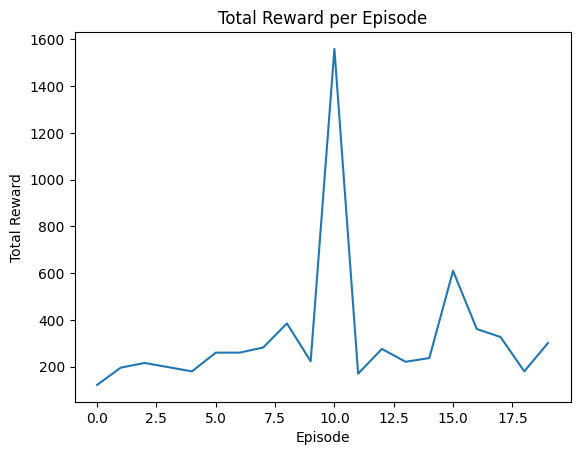

In [55]:
import matplotlib.pyplot as plt
if __name__ == "__main__":
    env = GridWorldEnvironment(start_point=(0, 0),
                               end_point=(4, 4),
                               gridworld_size=(5, 5))
    agent = SARSAgent(env.n_actions)
    rewards_per_episode = []  # 각 에피소드의 총 보상을 기록할 리스트

    for episode in range(20):
        state = env.reset()  # 환경 초기화
        action = agent.get_action(state)
        total_reward = 0  # 에피소드의 총 보상을 초기화

        while True:
            next_state, reward, done = env.step(action)
            next_action = agent.get_action(next_state)
            agent.learn(state, action, reward, next_state, next_action)

            total_reward += reward  # 보상 누적
            state = next_state
            action = next_action

            if done:
                break

        rewards_per_episode.append(total_reward)  # 에피소드당 총 보상 저장

    # 학습 성과를 시각화
    plt.plot(rewards_per_episode)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Total Reward per Episode')
    plt.show()


In [56]:
#위 그래프는 에피소드가 진행됨에 따라 에이전트의 학습 성능이 어떻게 변화하는지, 즉 시간이 지남에 따라 보상이 증가하는지 보여줌.